# Melbourne Housing Cluster Analysis

## About Dataset

This dataset provides data on ~35k houses in Melbourne Australia. This data can provide us with a variety of insights into the Melbourne housing market. This analysis can be used to determine which features most influence price, to create a predictive model for predicing price, and see if the Melbourne housing can be clustered into similar submarkets. Such submarket create would be useful for homebuyers, real estate investors, and real estate agents.

**Features include:**
* <code>Price</code> - home price/value in AUD
* <code>Method</code> - method for determining home price/value (S = sold, SP = sold prior, PI = passed in, PN = sold prior price not disclosed, NB = no bid, VB = vendor bid, W = withdrawn prior to auction, SA = sold after auction, SS = sold after auction price not disclosed, N/A = prior or highest bid not available)
* <code>Type</code> - h = house, u = unit, t = townhouse
* <code>Distance</code> - distance from central business district (CBD) in km
* <code>Car</code> - car spots
* <code>Landsize</code> - land size in meters
* <code>BuildingArea</code> - building size in meters
* <code>Propertycount</code> - number of properties in the home's suburb

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [148]:
file = "Melbourne_housing_FULL.csv"
df = pd.read_csv(file)

In [149]:
df.head()

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0  3/09/2016       2.5    3067.0       2.0       1.0  1.0     126.0   
1  3/12/2016       2.5    3067.0       2.0       1.0  1.0     202.0   
2  4/02/2016       2.5    3067.0       2.0       1.0  0.0     156.0   
3  4/02/2016       2.5    3067.0       3.0       2.0  1.0       0.0   
4  4/03/2017       2.5    3067.0       3.0       2.0  0.0     134.0   

   BuildingArea  YearBuilt         CouncilArea  Lattitude  Longtitude  \
0           NaN        NaN  Yarra City Council   -37.8014    144.9958   
1           NaN        NaN  Yarra City Council   -37.7996    144.9984   
2          79.0     1900.0  Yarra City Council   -37.8079    144.9934   
3           NaN        NaN  Yarra City Council   -37.8114    145.0116   
4         150.0     1900.0  Yarra City Council   -37.8093    144.9944   

              Regionname  Propertycount  
0  Northern Metropolitan         4019.0  
1  Northern Metropolitan         4019.0  
2  Northern Metropolitan         4019.0  
3  Northern Metropolitan         4019.0  
4  Northern Metropolitan         4019.0

## Data Cleaning

In [150]:
df.shape

(34857, 21)

* Clean up column names
* Convert Date to datetime
* Drop all rows that have do not have values for the columns in the new dataframe
* Drop duplicate rows

In [151]:
df1 = df

In [152]:
df1.rename(columns = {"SellerG" : "Agent", "Postcode" : "PostCode", "Bedroom2" : "Bedrooms", "Bathroom" : "Bathrooms", \
                     "Landsize" : "LandSize", "Regionname" : "Region", "Propertycount" : "PropertyCount", \
                      "Lattitude" : "Latitude", "Longtitude" : "Longitude"}, \
          inplace = True)

In [153]:
df1[["Date"]] = pd.to_datetime(df1["Date"])

In [154]:
df1.head()

Suburb             Address  Rooms Type      Price Method   Agent  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  PostCode  Bedrooms  Bathrooms  Car  LandSize  \
0 2016-03-09       2.5    3067.0       2.0        1.0  1.0     126.0   
1 2016-03-12       2.5    3067.0       2.0        1.0  1.0     202.0   
2 2016-04-02       2.5    3067.0       2.0        1.0  0.0     156.0   
3 2016-04-02       2.5    3067.0       3.0        2.0  1.0       0.0   
4 2017-04-03       2.5    3067.0       3.0        2.0  0.0     134.0   

   BuildingArea  YearBuilt         CouncilArea  Latitude  Longitude  \
0           NaN        NaN  Yarra City Council  -37.8014   144.9958   
1           NaN        NaN  Yarra City Council  -37.7996   144.9984   
2          79.0     1900.0  Yarra City Council  -37.8079   144.9934   
3           NaN        NaN  Yarra City Council  -37.8114   145.0116   
4         150.0     1900.0  Yarra City Council  -37.8093   144.9944   

                  Region  PropertyCount  
0  Northern Metropolitan         4019.0  
1  Northern Metropolitan         4019.0  
2  Northern Metropolitan         4019.0  
3  Northern Metropolitan         4019.0  
4  Northern Metropolitan         4019.0

In [155]:
df1.shape[0]

34857

In [156]:
df1.dropna(axis = 0, how = "any", inplace = True)

In [157]:
df1.shape[0]

8887

In [158]:
df1.drop_duplicates(subset = ["Address"], keep = "last", inplace = True)

In [159]:
df1.shape[0]

8764

In [160]:
samples_old = df.shape[0]
samples_new = df1.shape[0]
dropped = samples_old - samples_new
print("Dropped", dropped, "samples, which amounts to", round(dropped / samples_old * 100, 2), "% of the original dataset")
print("There are now", samples_new, "samples remaining, which amounts to", round(samples_new / samples_old * 100, 2), "% of the original dataset")

Dropped 0 samples, which amounts to 0.0 % of the original dataset
There are now 8764 samples remaining, which amounts to 100.0 % of the original dataset


In [161]:
df1.reset_index(drop = True, inplace = True)

In [162]:
df1.head()

Suburb          Address  Rooms Type      Price Method   Agent  \
0  Abbotsford  25 Bloomburg St      2    h  1035000.0      S  Biggin   
1  Abbotsford      55a Park St      4    h  1600000.0     VB  Nelson   
2  Abbotsford     124 Yarra St      3    h  1876000.0      S  Nelson   
3  Abbotsford    98 Charles St      2    h  1636000.0      S  Nelson   
4  Abbotsford    10 Valiant St      2    h  1097000.0      S  Biggin   

        Date  Distance  PostCode  Bedrooms  Bathrooms  Car  LandSize  \
0 2016-04-02       2.5    3067.0       2.0        1.0  0.0     156.0   
1 2016-04-06       2.5    3067.0       3.0        1.0  2.0     120.0   
2 2016-07-05       2.5    3067.0       4.0        2.0  0.0     245.0   
3 2016-08-10       2.5    3067.0       2.0        1.0  2.0     256.0   
4 2016-08-10       2.5    3067.0       3.0        1.0  2.0     220.0   

   BuildingArea  YearBuilt         CouncilArea  Latitude  Longitude  \
0          79.0     1900.0  Yarra City Council  -37.8079   144.9934   
1         142.0     2014.0  Yarra City Council  -37.8072   144.9941   
2         210.0     1910.0  Yarra City Council  -37.8024   144.9993   
3         107.0     1890.0  Yarra City Council  -37.8060   144.9954   
4          75.0     1900.0  Yarra City Council  -37.8010   144.9989   

                  Region  PropertyCount  
0  Northern Metropolitan         4019.0  
1  Northern Metropolitan         4019.0  
2  Northern Metropolitan         4019.0  
3  Northern Metropolitan         4019.0  
4  Northern Metropolitan         4019.0

In [163]:
df1.shape

(8764, 21)

## Exploratory Data Analysis
#### Variable Correlations and Distributions 

Use correlation matrix to see which variables are correlated with one another

In [164]:
corr = df1.corr().replace(1, np.nan)

<AxesSubplot:>

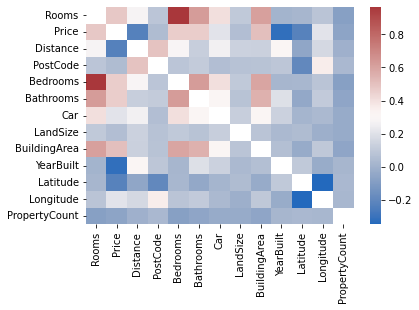

In [165]:
sns.heatmap(corr, cmap = "vlag")

In [166]:
for column in corr.columns:
    max_corr = corr[column].max()
    max_corr_col = corr[corr[column] == max_corr].index[0]
    print(column)
    print(max_corr_col, ":", corr[column].max())
    print("-" * 70)

Rooms
Bedrooms : 0.9649101213443783
----------------------------------------------------------------------
Price
BuildingArea : 0.505462629601538
----------------------------------------------------------------------
Distance
PostCode : 0.4902211914554586
----------------------------------------------------------------------
PostCode
Distance : 0.4902211914554586
----------------------------------------------------------------------
Bedrooms
Rooms : 0.9649101213443783
----------------------------------------------------------------------
Bathrooms
Bedrooms : 0.6262408450883022
----------------------------------------------------------------------
Car
Bedrooms : 0.40630524678595314
----------------------------------------------------------------------
LandSize
Distance : 0.13709302251351893
----------------------------------------------------------------------
BuildingArea
Rooms : 0.6074607657778458
----------------------------------------------------------------------
YearBuilt
Distanc

In [167]:
corr["Price"].sort_values(ascending = False)

BuildingArea     0.505463
Rooms            0.475328
Bathrooms        0.461586
Bedrooms         0.459890
Longitude        0.211812
Car              0.208111
LandSize         0.057288
PostCode         0.044542
PropertyCount   -0.060849
Latitude        -0.223994
Distance        -0.232696
YearBuilt       -0.315569
Price                 NaN
Name: Price, dtype: float64

There is not a very high degree of correlation between most of the variables, with the exception of Rooms and Bedrooms

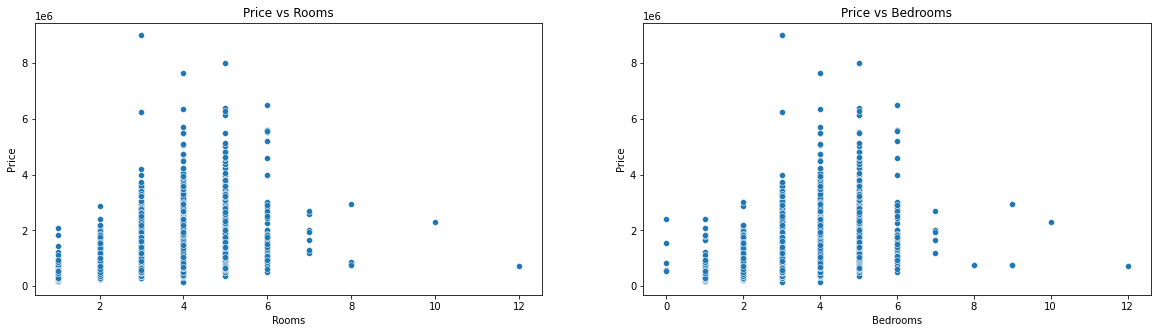

In [168]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))

sns.scatterplot(data = df1, x = "Rooms", y = "Price", ax = ax[0])
ax[0].set_title("Price vs Rooms")

sns.scatterplot(data = df1, x = "Bedrooms", y = "Price", ax = ax[1])
ax[1].set_title("Price vs Bedrooms")

plt.show()

Property rooms and bedrooms certainly have some correlation with price, but not an overwhelming amount.

#### Building Area

C:\Users\ikant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Building Area Box Plot')

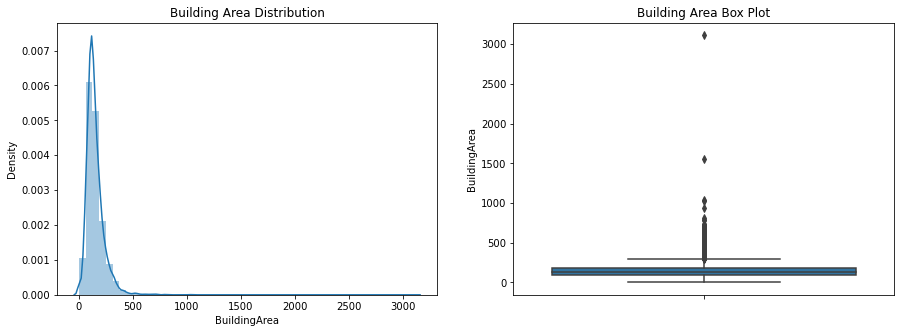

In [169]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

sns.distplot(df1["BuildingArea"], ax = ax[0])
ax[0].set_title("Building Area Distribution")

sns.boxplot(data = df1, y = "BuildingArea", ax = ax[1])
ax[1].set_title("Building Area Box Plot")

In [170]:
len(df1[df1["BuildingArea"] > 2000])

1

There are a number of outliers on the high end, but only one truly extreme outlier, with BuildingArea over 3,000 (the only one over 2,000), that is worth eliminating.

#### Rooms

Text(0.5, 1.0, 'Rooms Box Plot')

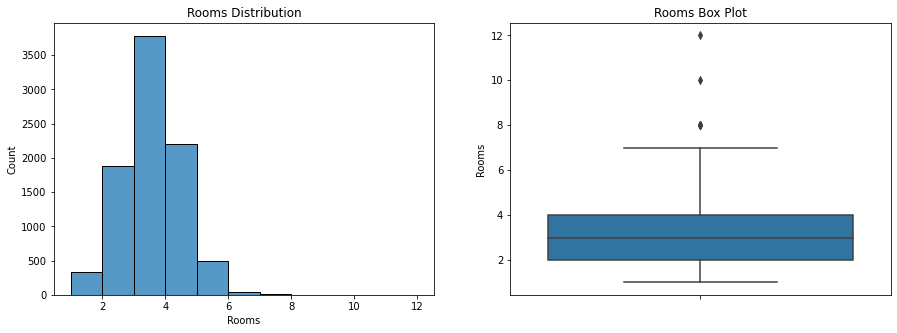

In [171]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

sns.histplot(df1["Rooms"], ax = ax[0], binwidth = 1)
ax[0].set_title("Rooms Distribution")

sns.boxplot(data = df1, y = "Rooms", ax = ax[1])
ax[1].set_title("Rooms Box Plot")

Distribution appears normal, with a few extreme outliers on the high side

#### Bathrooms

Text(0.5, 1.0, 'Bathrooms Box Plot')

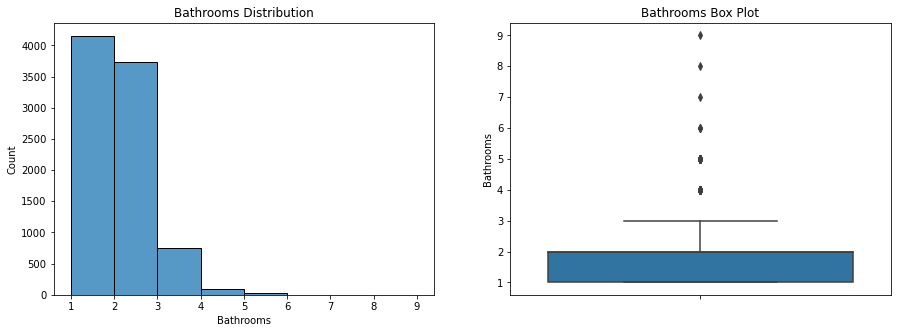

In [172]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

sns.histplot(df1["Bathrooms"], ax = ax[0], binwidth = 1)
ax[0].set_title("Bathrooms Distribution")

sns.boxplot(data = df1, y = "Bathrooms", ax = ax[1])
ax[1].set_title("Bathrooms Box Plot")

Heavy right skew, meaning most properties contain 1-2 bathrooms, a some with 3-4, and a set of outliers with 5 and above 

#### Bedrooms

Text(0.5, 1.0, 'Bedrooms Box Plot')

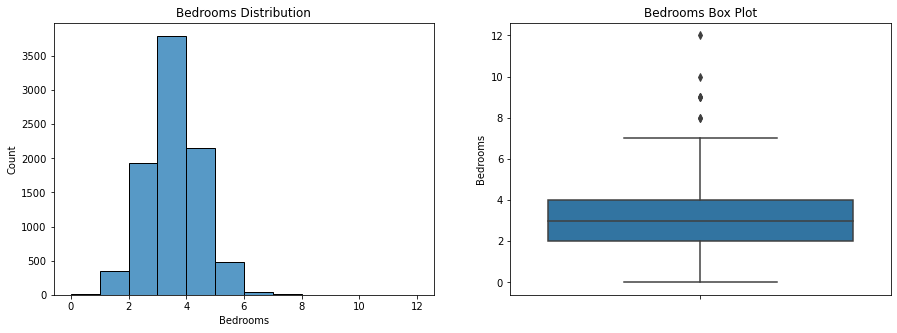

In [173]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

sns.histplot(df1["Bedrooms"], ax = ax[0], binwidth = 1)
ax[0].set_title("Bedrooms Distribution")

sns.boxplot(data = df1, y = "Bedrooms", ax = ax[1])
ax[1].set_title("Bedrooms Box Plot")

Distribution appears normal, with a few extreme outliers on the high side

#### Car

Text(0.5, 1.0, 'Car Box Plot')

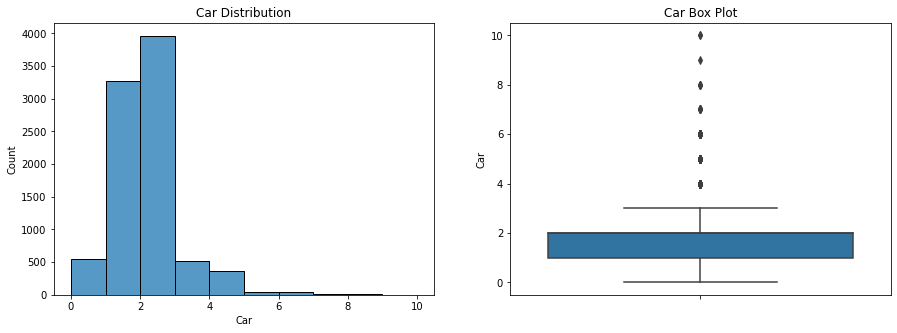

In [174]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

sns.histplot(df1["Car"], ax = ax[0], binwidth = 1)
ax[0].set_title("Car Distribution")

sns.boxplot(data = df1, y = "Car", ax = ax[1])
ax[1].set_title("Car Box Plot")

Slight right skew, with most properties containing 1-4 car spots and a set of outliers with 5 and above 

#### LandSize

C:\Users\ikant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Land Size Box Plot')

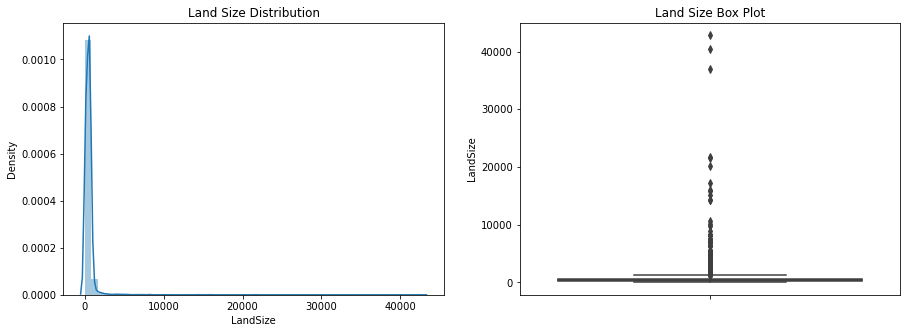

In [175]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

sns.distplot(df1["LandSize"], ax = ax[0])
ax[0].set_title("Land Size Distribution")

sns.boxplot(data = df1, y = "LandSize", ax = ax[1])
ax[1].set_title("Land Size Box Plot")

In [176]:
len(df1[df1["LandSize"] > 25000])

3

In [177]:
LS_q25, LS_q75 = np.percentile(df1["LandSize"], 25), np.percentile(df1["LandSize"], 75)
LS_IQR = LS_q75 - LS_q25
LS_cutoff = LS_IQR * 1.5
LS_upper = LS_q75 + LS_cutoff

len(df1[(df1["LandSize"] > LS_upper) & (df1["LandSize"] < 25000)])

204

Extreme right skew, meaning there are many extreme outliers on the high end. However, many of the outliers (206) are outliers, but may be part of their own cluster. The data points above 25,000 are worth eliminating.

#### Distance

C:\Users\ikant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distance Box Plot')

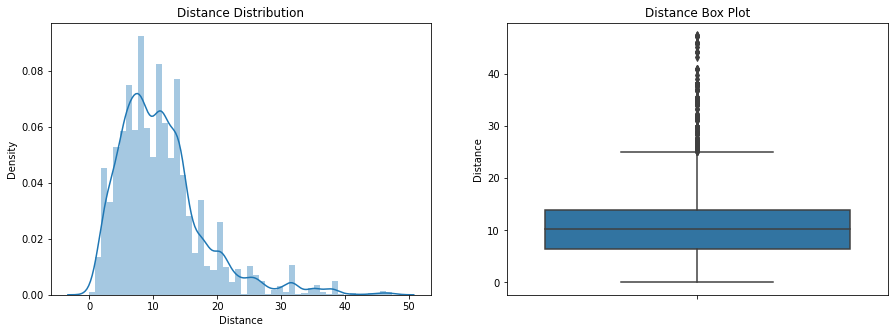

In [178]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

sns.distplot(df1["Distance"], ax = ax[0])
ax[0].set_title("Distance Distribution")

sns.boxplot(data = df1, y = "Distance", ax = ax[1])
ax[1].set_title("Distance Box Plot")

Slight right skew, with some outliers on the high end

#### YearBuilt

Text(0.5, 1.0, 'Year Built Box Plot')

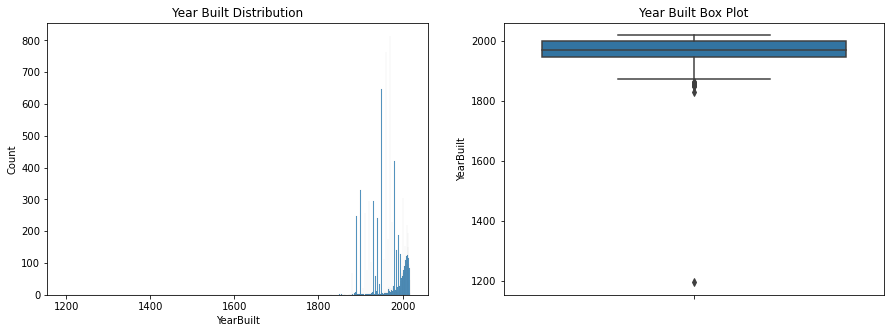

In [179]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

sns.histplot(df1["YearBuilt"], ax = ax[0], binwidth = 1)
ax[0].set_title("Year Built Distribution")

sns.boxplot(data = df1, y = "YearBuilt", ax = ax[1])
ax[1].set_title("Year Built Box Plot")

In [180]:
len(df1[df1["YearBuilt"] < 1800])

1

As expected, there is a left skew, however it is significantly distorted by one home built around 1200 AD. That property is the only one build before 1800 and therefore, worth eliminating from the dataset.

#### Price

C:\Users\ikant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Box Plot')

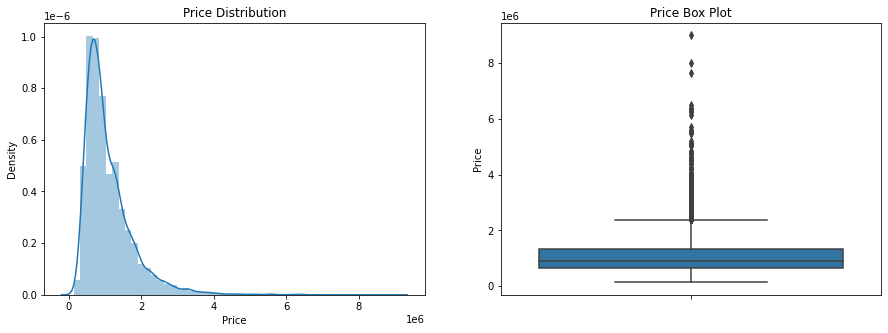

In [181]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

sns.distplot(df1["Price"], ax = ax[0])
ax[0].set_title("Price Distribution")

sns.boxplot(data = df1, y = "Price", ax = ax[1])
ax[1].set_title("Price Box Plot")

Slight right skew, with many outliers falling between prices of AUD 2.5 and 9 million 

*Distributions indicate that there are some samples to eliminate in order to increase the accuracy of both clustering and predictive models*
* Drop samples with BuildingArea over 3,000 square meters
* Drop samples with LandSize over 25,000 square meters
* Drop samples with YearBuilt before 1800 AD

## Feature Engineering

Create array of features with outliers removed to be used for analysis

In [182]:
df1 = df1[df1["BuildingArea"] < 3000]
df1 = df1[df1["LandSize"] < 25000]
df1 = df1[df1["YearBuilt"] > 1800]
X = df1[["BuildingArea", "Rooms", "Bathrooms", "Bedrooms", "Car", "LandSize", "Distance", "YearBuilt", "Price"]]

In [183]:
print(df1.shape)
print(X.shape)

(8759, 21)
(8759, 9)


In [184]:
X = X.to_numpy()

In [185]:
X[0:5]

array([[7.900e+01, 2.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 1.560e+02,
        2.500e+00, 1.900e+03, 1.035e+06],
       [1.420e+02, 4.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 1.200e+02,
        2.500e+00, 2.014e+03, 1.600e+06],
       [2.100e+02, 3.000e+00, 2.000e+00, 4.000e+00, 0.000e+00, 2.450e+02,
        2.500e+00, 1.910e+03, 1.876e+06],
       [1.070e+02, 2.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 2.560e+02,
        2.500e+00, 1.890e+03, 1.636e+06],
       [7.500e+01, 2.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 2.200e+02,
        2.500e+00, 1.900e+03, 1.097e+06]])

## K-Means Clustering

In [186]:
from sklearn.cluster import KMeans 

#### Elbow Method
Method for determining the optimal number of clusters. The optimal number of clusters is the one the minimum amount of intra-cluster variation ("within cluster sum of squared distances" or WSS). The Elbow Method shows this ideal number of clusters as the inflection point, where increasing the number of clusters does not have a significant impact. 

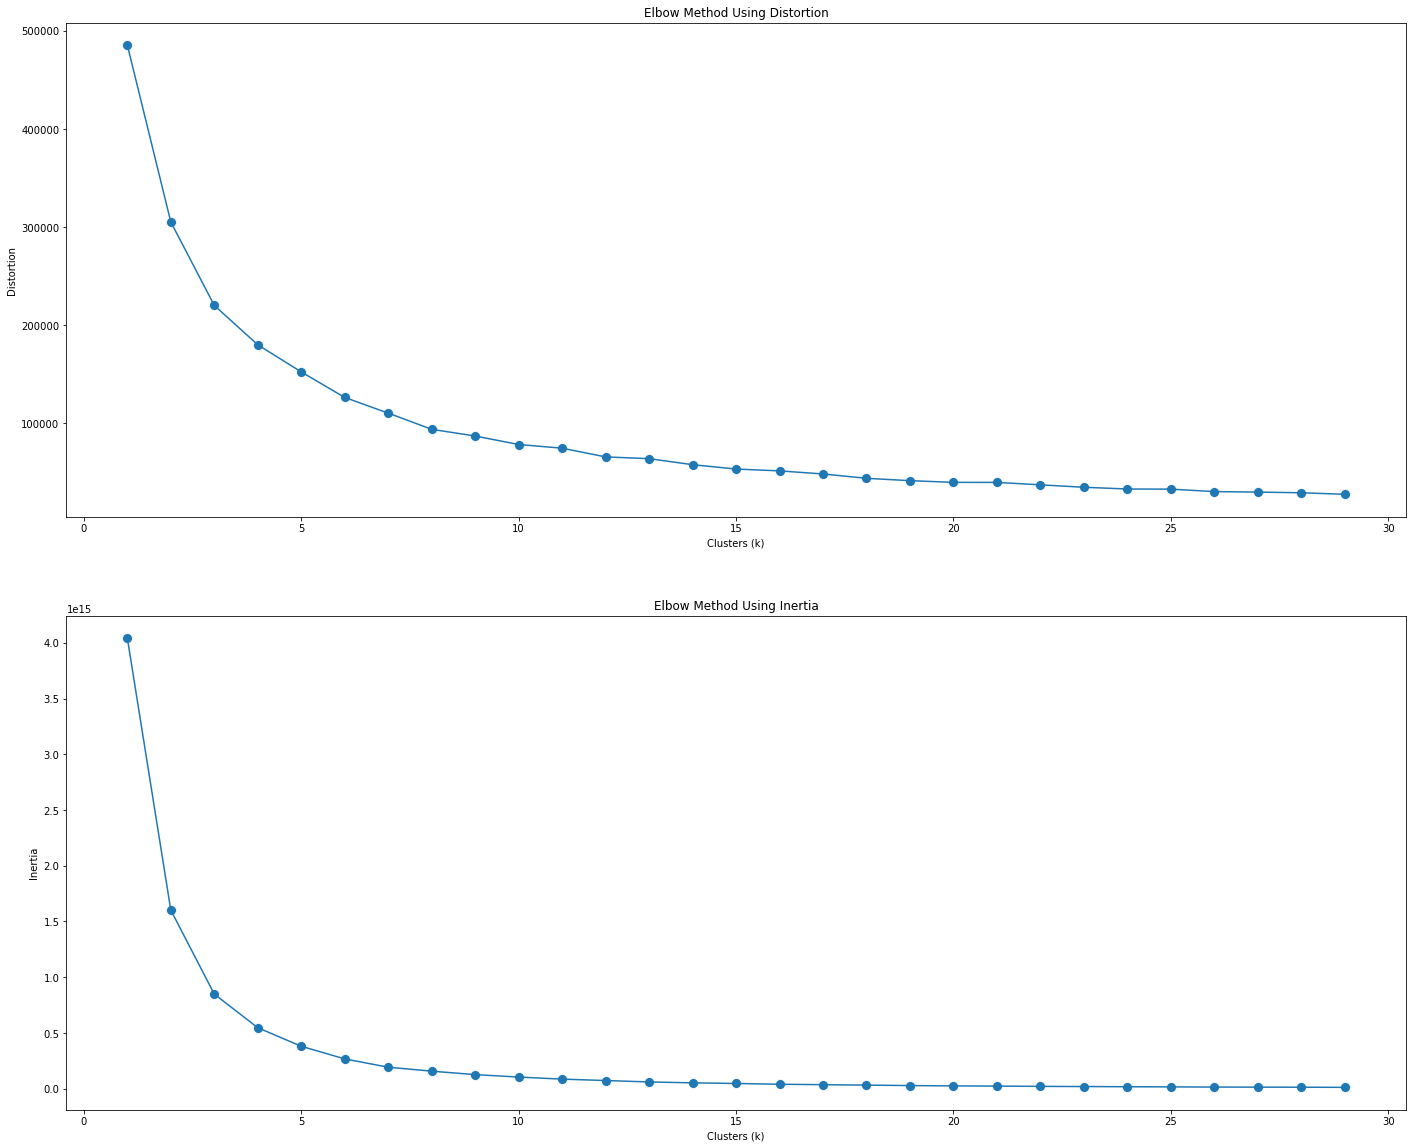

In [187]:
from scipy.spatial.distance import cdist # cdist computes the distance between each pair in the two inputs

distortions = [] # average of the euclidean squared distances from the centroid of the respective clusters
inertias = [] # sum of the squared distances between each data point and its centroid for each cluster

K = range(1, 30)

for k in K:
    
    # Build K-Means clustering object and fit to data
    K_Means = KMeans(n_clusters = k, random_state = 15).fit(X)
    
    # Find the distortion for each value of k
    # Distortion = average of the minimum distances between the each X column value and the K-Means cluster centers
    distortions.append(sum(np.min(cdist(X, K_Means.cluster_centers_, "euclidean"), axis = 1)) / X.shape[0])
    
    # Find the initia for each value of k
    # Inertia = sum of square distances from samples to their closest cluster center 
    inertias.append(K_Means.inertia_)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (24, 20))

sns.lineplot(x = K, y = distortions, ax = ax1)
sns.scatterplot(x = K, y = distortions, ax = ax1, s = 100)
ax1.set_xlabel("Clusters (k)")
ax1.set_ylabel("Distortion")
ax1.set_title("Elbow Method Using Distortion")

sns.lineplot(x = K, y = inertias, ax = ax2)
sns.scatterplot(x = K, y = inertias, ax = ax2, s = 100)
ax2.set_xlabel("Clusters (k)")
ax2.set_ylabel("Inertia")
ax2.set_title("Elbow Method Using Inertia")

plt.show()

In [188]:
!pip install scikit-plot

In [189]:
import scikitplot as skplt

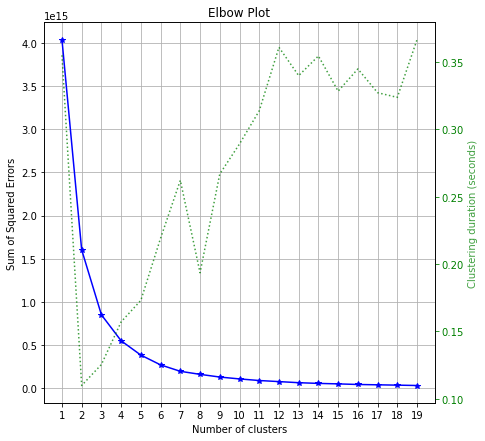

In [190]:
kmeans = KMeans(random_state = 15)
skplt.cluster.plot_elbow_curve(kmeans, X, cluster_ranges = range(1, 20), figsize = (7, 7))
plt.xticks(list(range(1, 20)))
plt.show()

#### Other Methods for Determining Ideal Number of Clusters

*Silhouette Score:* measures the separation distance between resulting clusters, where a value of 1 indicates that the sample is far from neighboring clusters and a value of 0 indicates it is close to the decision boundary between its cluster and its neighboring cluster. 

*Davies Douldin Score:*  measures average similarity of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances, so better clustering is shown by a value (similarity) closer to 0

*Calinski Harabasz Score:*  measures the ratio of the sum of inter-cluster dispersion to the sum of intra-cluster dispersion, where dispersion is the sum of squared distances and higher values indicate better clustering

In [191]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

clust_sil_score = ["-", "-"]
clust_dav_score = ["-", "-"]
clust_cal_score = ["-", "-"]

for i in range(2, 11):
    
    KMC = KMeans(n_clusters = i, random_state = 15).fit(X)
    KMC_predict = KMC.predict(X)
    
    clust_sil_score.append(silhouette_score(X, KMC_predict))
    clust_dav_score.append(davies_bouldin_score(X, KMC_predict))
    clust_cal_score.append(calinski_harabasz_score(X, KMC_predict))

    print(i, "Clusters:")
    print("Silhouette Score =", clust_sil_score[i])
    print("Davies Bouldin Score =", clust_dav_score[i])
    print("Calinski Harabasz Score =", clust_cal_score[i])
    print("")

2 Clusters:
Silhouette Score = 0.6635838779161759
Davies Bouldin Score = 0.5722499396809962
Calinski Harabasz Score = 13339.444961271525

3 Clusters:
Silhouette Score = 0.6171643347182874
Davies Bouldin Score = 0.5465562957117184
Calinski Harabasz Score = 16480.507592510054

4 Clusters:
Silhouette Score = 0.5844802526554114
Davies Bouldin Score = 0.5435579872205795
Calinski Harabasz Score = 18657.369423843375

5 Clusters:
Silhouette Score = 0.5512505106536971
Davies Bouldin Score = 0.5587039812012593
Calinski Harabasz Score = 21059.398921107906

6 Clusters:
Silhouette Score = 0.5460708695459963
Davies Bouldin Score = 0.5330613134641657
Calinski Harabasz Score = 24746.581577374443

7 Clusters:
Silhouette Score = 0.5523451653770094
Davies Bouldin Score = 0.5143593787914873
Calinski Harabasz Score = 29163.59484076216

8 Clusters:
Silhouette Score = 0.5331538453323431
Davies Bouldin Score = 0.5146454333961814
Calinski Harabasz Score = 30900.49812646615

9 Clusters:
Silhouette Score = 0.527

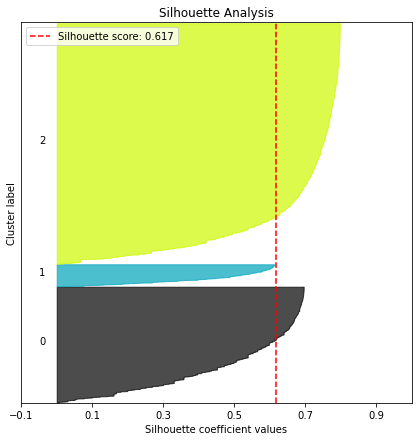

In [192]:
kmeans = KMeans(n_clusters = 3, random_state = 15).fit(X)
kmeans_predict = kmeans.predict(X)
    
skplt.metrics.plot_silhouette(X, kmeans_predict, figsize=(7,7))
plt.show()

Based on the Elbow Plot, Silhouette Score, Davies Bouldin Score, and Calinski Score, the ideal number of clusters appears to be 3 clusters 

#### K-Means Clustering

In [193]:
clusters = 3
kmeans = KMeans(n_clusters = clusters).fit(X)
labels = kmeans.labels_
np.unique(labels, return_counts = True)

(array([0, 1, 2]), array([2667, 5584,  508], dtype=int64))

In [194]:
len(labels) == len(df1)

True

Create new dataframe which includes the k-means clusters for each property as a column. Then analyze the features of each cluster.

In [195]:
df_kmeans = df1[["BuildingArea", "Rooms", "Bathrooms", "Bedrooms", "Car", "LandSize", "Distance", "YearBuilt", "Price"]]
df_kmeans["Cluster"] = labels

C:\Users\ikant\AppData\Local\Temp/ipykernel_18764/310780951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans["Cluster"] = labels


In [196]:
df_kmeans.head()

BuildingArea  Rooms  Bathrooms  Bedrooms  Car  LandSize  Distance  \
0          79.0      2        1.0       2.0  0.0     156.0       2.5   
1         142.0      4        1.0       3.0  2.0     120.0       2.5   
2         210.0      3        2.0       4.0  0.0     245.0       2.5   
3         107.0      2        1.0       2.0  2.0     256.0       2.5   
4          75.0      2        1.0       3.0  2.0     220.0       2.5   

   YearBuilt      Price  Cluster  
0     1900.0  1035000.0        1  
1     2014.0  1600000.0        0  
2     1910.0  1876000.0        0  
3     1890.0  1636000.0        0  
4     1900.0  1097000.0        1

In [197]:
df_kmeans.groupby("Cluster").mean()

BuildingArea     Rooms  Bathrooms  Bedrooms       Car    LandSize  \
Cluster                                                                      
0          177.347123  3.475816   1.852643  3.439445  1.784402  519.414698   
1          124.134773  2.817514   1.459527  2.807307  1.598138  485.841153   
2          270.116083  4.188976   2.594488  4.135827  2.236220  745.303150   

          Distance    YearBuilt         Price  
Cluster                                        
0         9.183952  1950.188976  1.519984e+06  
1        12.497869  1975.349749  7.106686e+05  
2         7.957087  1945.799213  3.022558e+06

In [198]:
df_kmeans.groupby("Cluster").std()

BuildingArea     Rooms  Bathrooms  Bedrooms       Car    LandSize  \
Cluster                                                                      
0           76.479657  0.816004   0.719227  0.824642  0.989258  426.562524   
1           66.891913  0.902665   0.592939  0.911512  0.930528  910.090241   
2          102.026480  0.835431   0.946773  0.869864  1.098370  523.830715   

         Distance  YearBuilt          Price  
Cluster                                      
0        4.615281  38.775049  300388.920144  
1        7.558090  29.900474  205306.592636  
2        3.284410  44.811099  857208.067624

**Cluster 0**: 
* medium-price
* most feature values are between the other clusers

**Cluster 1** 
* low-price
* smallest building size and land size (high deviation in land size)
* least rooms, bedrooms, and bathrooms
* furthest distance from city center (high deviation in distance)
* newest built

**Cluster 2**
* high-price
* largest building size and land size (high deviation in building size)
* most rooms, bedrooms, and bathrooms
* closest to city center

## Visualizing Property Clusters

#### Feature Reduction
Use tSNE feature reduction to visualize observations on a two-component axis

In [199]:
from sklearn.manifold import TSNE

X = df_kmeans.drop("Cluster", axis = 1).values
Y = df_kmeans["Cluster"].values 

X_tsne = TSNE(n_components = 2, random_state = 15).fit_transform(X)

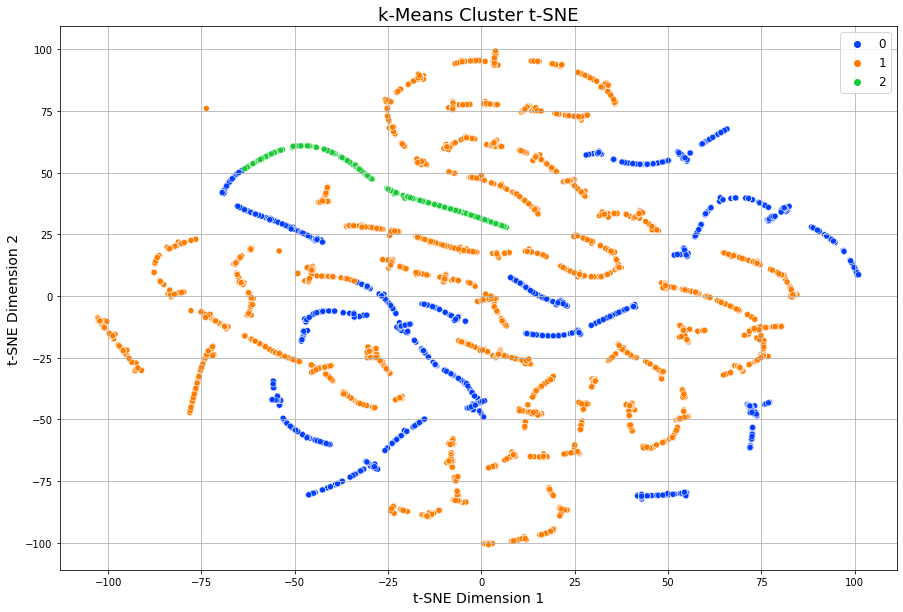

In [200]:
plt.figure(figsize = (15, 10))
sns.scatterplot(x = X_tsne[:,0], y = X_tsne[:,1], hue = Y, palette = "bright")
plt.title("k-Means Cluster t-SNE", fontsize = 18)
plt.xlabel("t-SNE Dimension 1", fontsize = 14)
plt.ylabel("t-SNE Dimension 2", fontsize = 14)
plt.legend(fontsize = 12)
plt.grid(True)
plt.show()

#### Folium
Use folium to visualize property on map

In [201]:
import folium
from folium.plugins import MarkerCluster
from folium.plugins import MousePosition
from folium.features import DivIcon

In [202]:
df_map = df1
df_map["Cluster"] = labels

In [203]:
df_map.head()

Suburb          Address  Rooms Type      Price Method   Agent  \
0  Abbotsford  25 Bloomburg St      2    h  1035000.0      S  Biggin   
1  Abbotsford      55a Park St      4    h  1600000.0     VB  Nelson   
2  Abbotsford     124 Yarra St      3    h  1876000.0      S  Nelson   
3  Abbotsford    98 Charles St      2    h  1636000.0      S  Nelson   
4  Abbotsford    10 Valiant St      2    h  1097000.0      S  Biggin   

        Date  Distance  PostCode  Bedrooms  Bathrooms  Car  LandSize  \
0 2016-04-02       2.5    3067.0       2.0        1.0  0.0     156.0   
1 2016-04-06       2.5    3067.0       3.0        1.0  2.0     120.0   
2 2016-07-05       2.5    3067.0       4.0        2.0  0.0     245.0   
3 2016-08-10       2.5    3067.0       2.0        1.0  2.0     256.0   
4 2016-08-10       2.5    3067.0       3.0        1.0  2.0     220.0   

   BuildingArea  YearBuilt         CouncilArea  Latitude  Longitude  \
0          79.0     1900.0  Yarra City Council  -37.8079   144.9934   
1         142.0     2014.0  Yarra City Council  -37.8072   144.9941   
2         210.0     1910.0  Yarra City Council  -37.8024   144.9993   
3         107.0     1890.0  Yarra City Council  -37.8060   144.9954   
4          75.0     1900.0  Yarra City Council  -37.8010   144.9989   

                  Region  PropertyCount  Cluster  
0  Northern Metropolitan         4019.0        1  
1  Northern Metropolitan         4019.0        0  
2  Northern Metropolitan         4019.0        0  
3  Northern Metropolitan         4019.0        0  
4  Northern Metropolitan         4019.0        1

In [222]:
melbourne_coordinate = [-37.8136, 144.9631]
prop_map = folium.Map(location = melbourne_coordinate, zoom_start = 10)
prop_map

In [223]:
df_clust0 = df_map[df_map["Cluster"] == 0]
df_clust0.reset_index(drop = True, inplace = True)

df_clust1 = df_map[df_map["Cluster"] == 1]
df_clust1.reset_index(drop = True, inplace = True)

df_clust2 = df_map[df_map["Cluster"] == 2]
df_clust2.reset_index(drop = True, inplace = True)

In [224]:
for i in range(len(df_clust0)):
    
    # Add blue markers for properties in cluster 0 
    circle0 = folium.Circle([df_clust0.loc[i, "Latitude"], df_clust0.loc[i, "Longitude"]], radius = 100, color = "blue", fill = True)
    prop_map.add_child(circle0)

for i in range(len(df_clust1)):
    
    # Add orange markers for properties in cluster 0 
    circle1 = folium.Circle([df_clust1.loc[i, "Latitude"], df_clust1.loc[i, "Longitude"]], radius = 100, color = "orange", fill = True)
    prop_map.add_child(circle1)

for i in range(len(df_clust2)):

    # Add green markers for properties in cluster 0 
    circle2 = folium.Circle([df_clust2.loc[i, "Latitude"], df_clust2.loc[i, "Longitude"]], radius = 100, color = "green", fill = True)
    prop_map.add_child(circle2)
    
prop_map